## **Popular Unsupervised Clustering Algorithms**

k-means로
unlabeled 데이터 직관적으로 파악하기

In [2]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings

warnings.filterwarnings('ignore')
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Datasets"))

['UCI HAR Dataset', 'car_evaluation.csv', 'santander-customer-satisfaction', 'creditcard.csv', 'water_potability.csv', 'winequality-red.csv', 'bike-sharing-demand', 'house-prices-advanced-regression-techniques', 'default of credit card clients.xls', 'Online Retail.xlsx', 'labeledTrainData.tsv', 'Mall_Customers.csv']


데이터셋 로드 및 정보 확인

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


복잡한 칼럼명 수정

In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


pairplot으로 데이터셋 형태(피처간의 관계) 확인

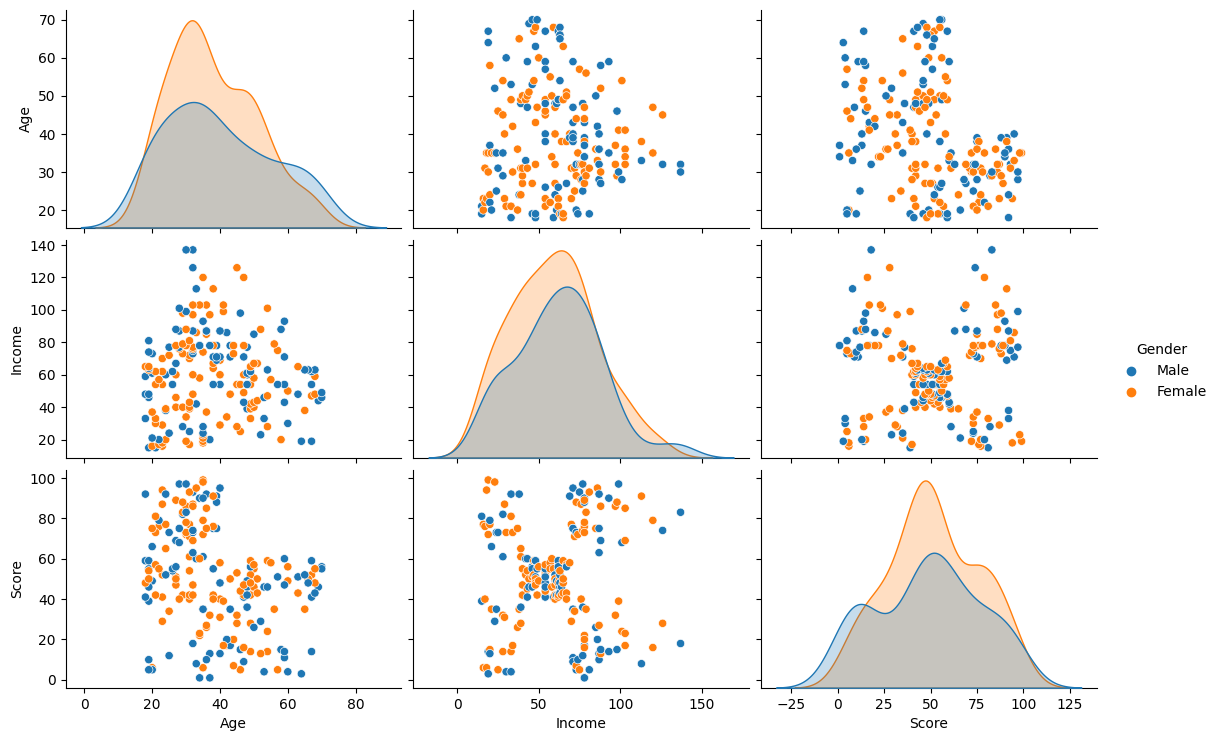

In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Male/Female이 분리되지 않는 것을 보면 성별은 분할에 영향을 주지 않는다. 따라서 사용자 아이디와 성별은 drop

elbow point 찾기 : 클러스터 수 변화시키며 inertia 급격히 바뀌는 부분에 애로우 표시

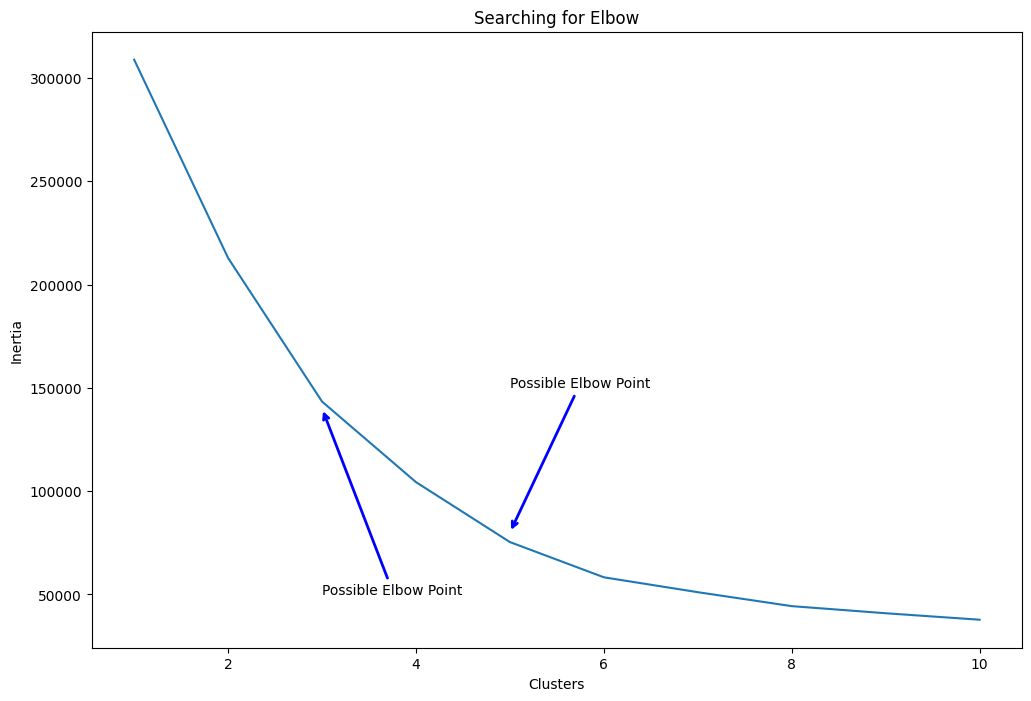

In [7]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

3 또는 5 가 적절


위 Elbow method로 찾은 Elbow Point인 clusters =3 & n_cluster=5 로 군집화 및 시각화

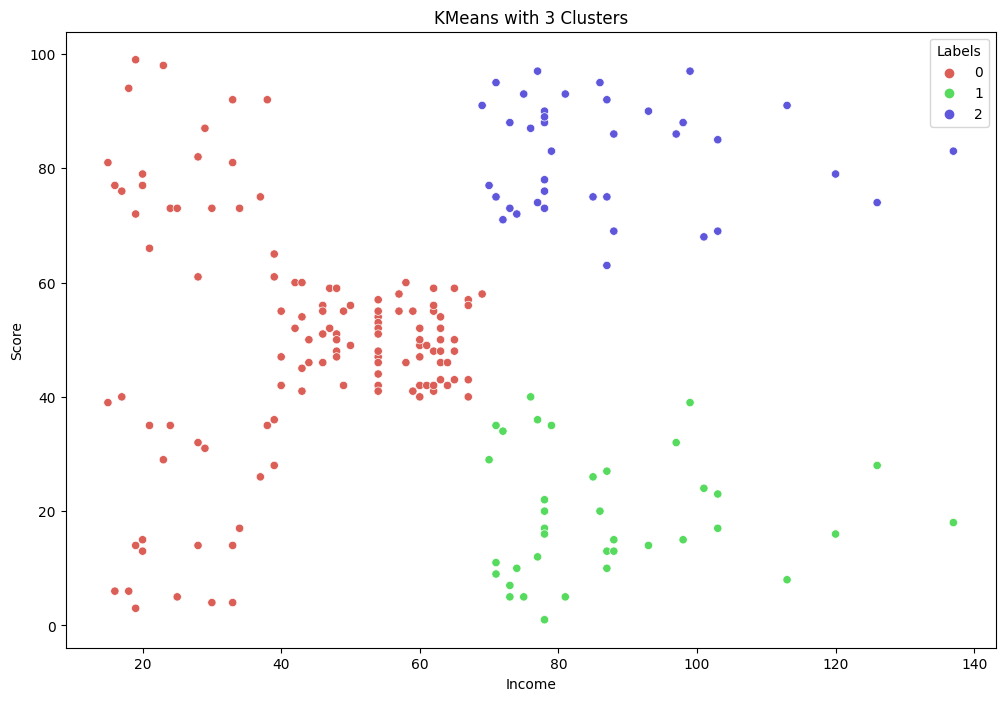

In [20]:

km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()


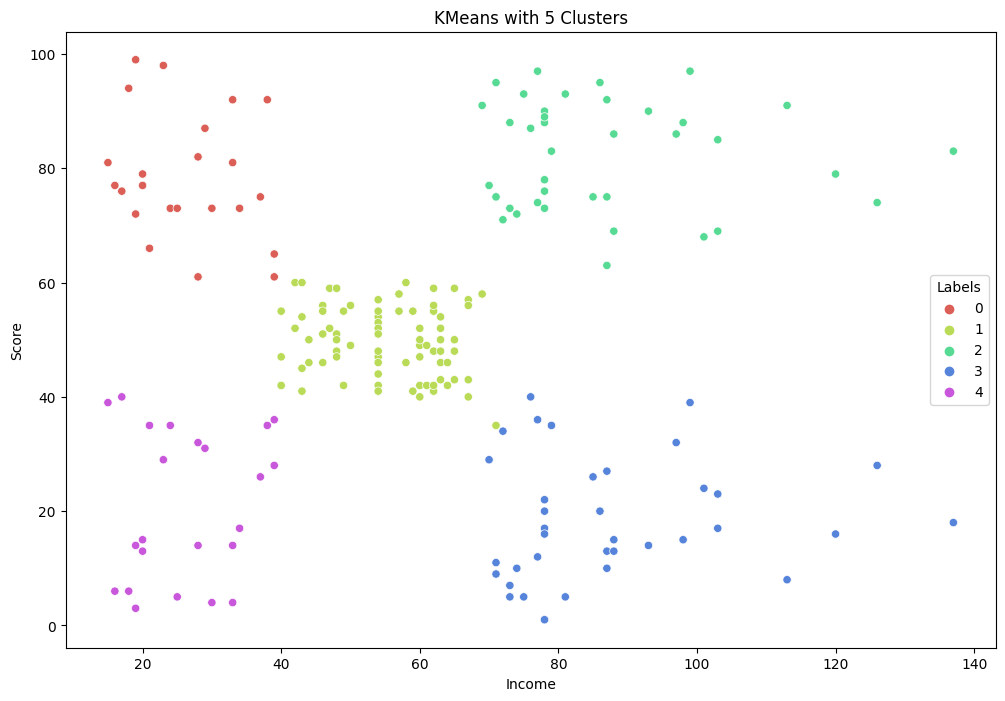

In [21]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

산점도를 직관적으로 봤을 때 클러스터의 수가 5일때가 더 나음. 각 군집을 설명하자면



1.  low income & low spending
2.  high income & high spending
3.  mid income & mid spending
4.  high income & low spending
5.  low income & high spending



swarmplot으로 군집간 차이 확인


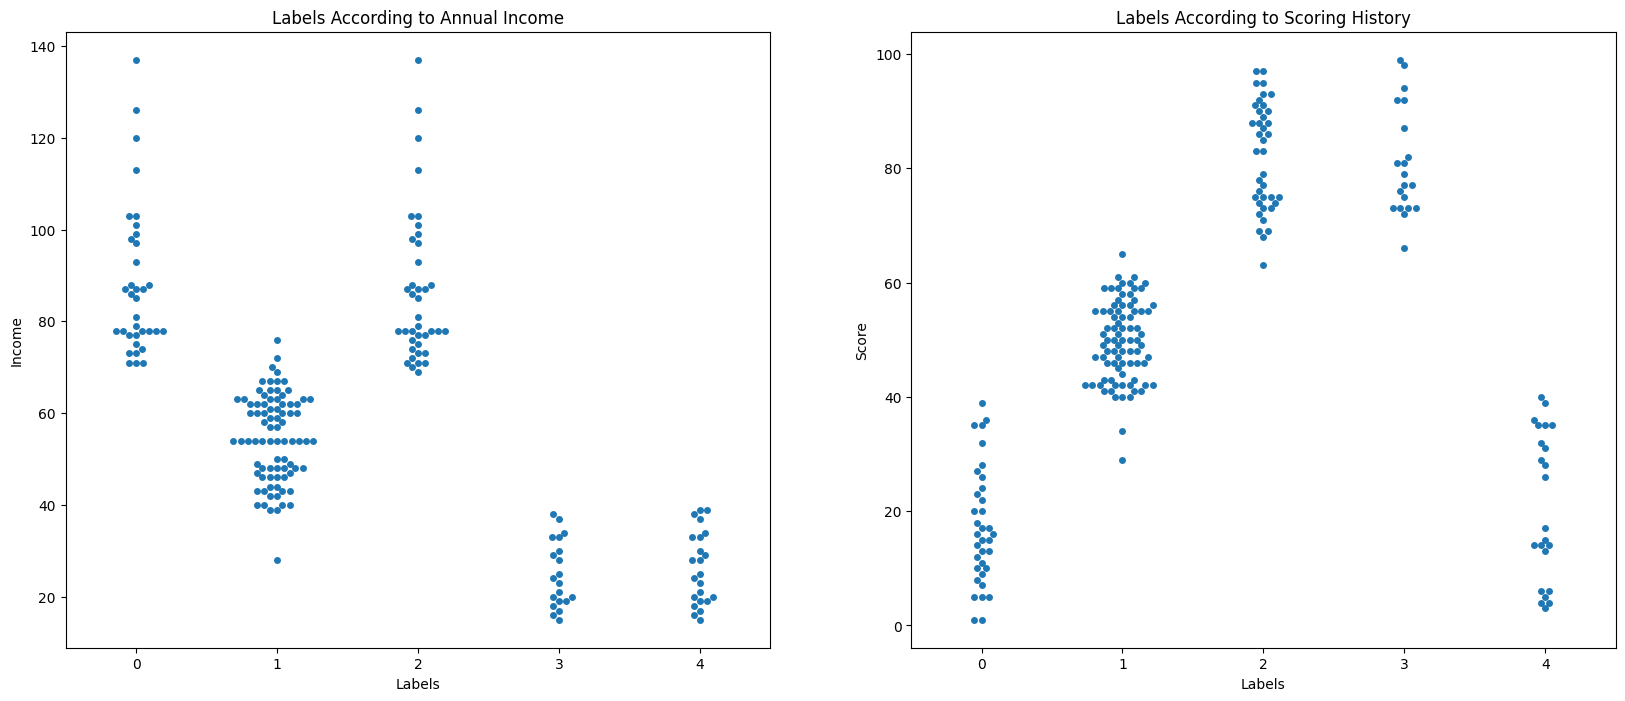

In [28]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

Hierarchical Clustering (계층적 군집화)
-Agglomerative Hierarchical Clustering : 작은 단위부터 클러스터링 시작 ~ 모든 데이터가 하나가 될 때까지 반복(bottm up)

params
- n_clusters : 만들 군집 수
- linkage : 군집으로 묶는 기준



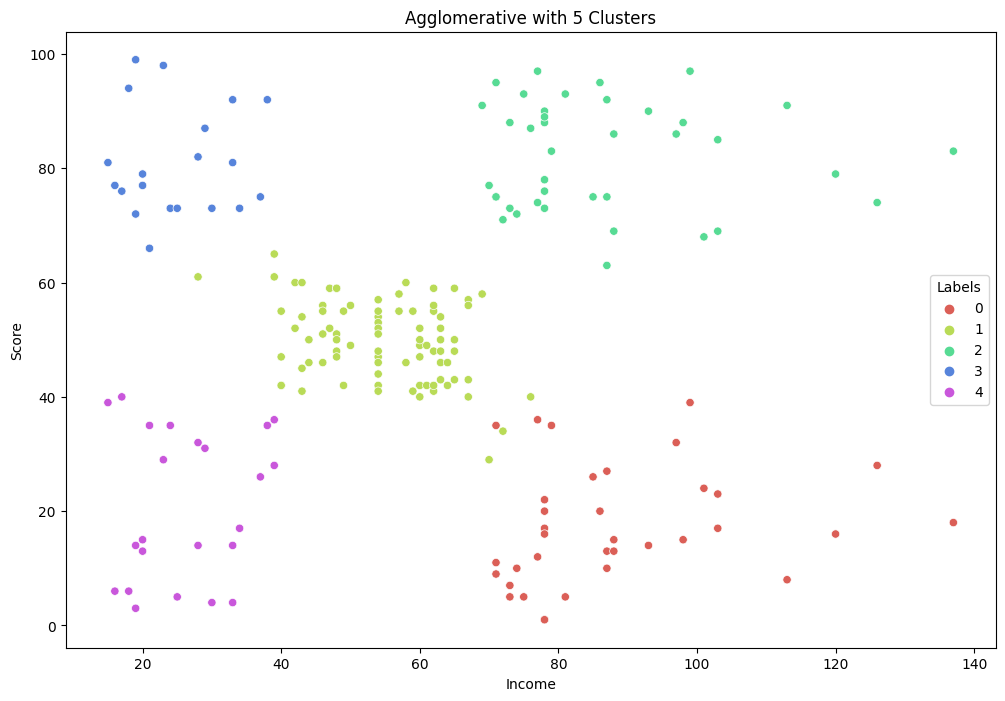

In [29]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

이 계층적 군집은 dendrogram 을 사용해 시각화하는 것으로 군집화를 쉽게 이해할 수 있음.
그래프 그리기 위해 데이터간 거리를 계산하여 저장

In [30]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


linkage 클래스 이용하여 비슷한 것끼리 묶어나가기
1. complete linkage 사용

In [31]:
Z = hierarchy.linkage(dist, 'complete')

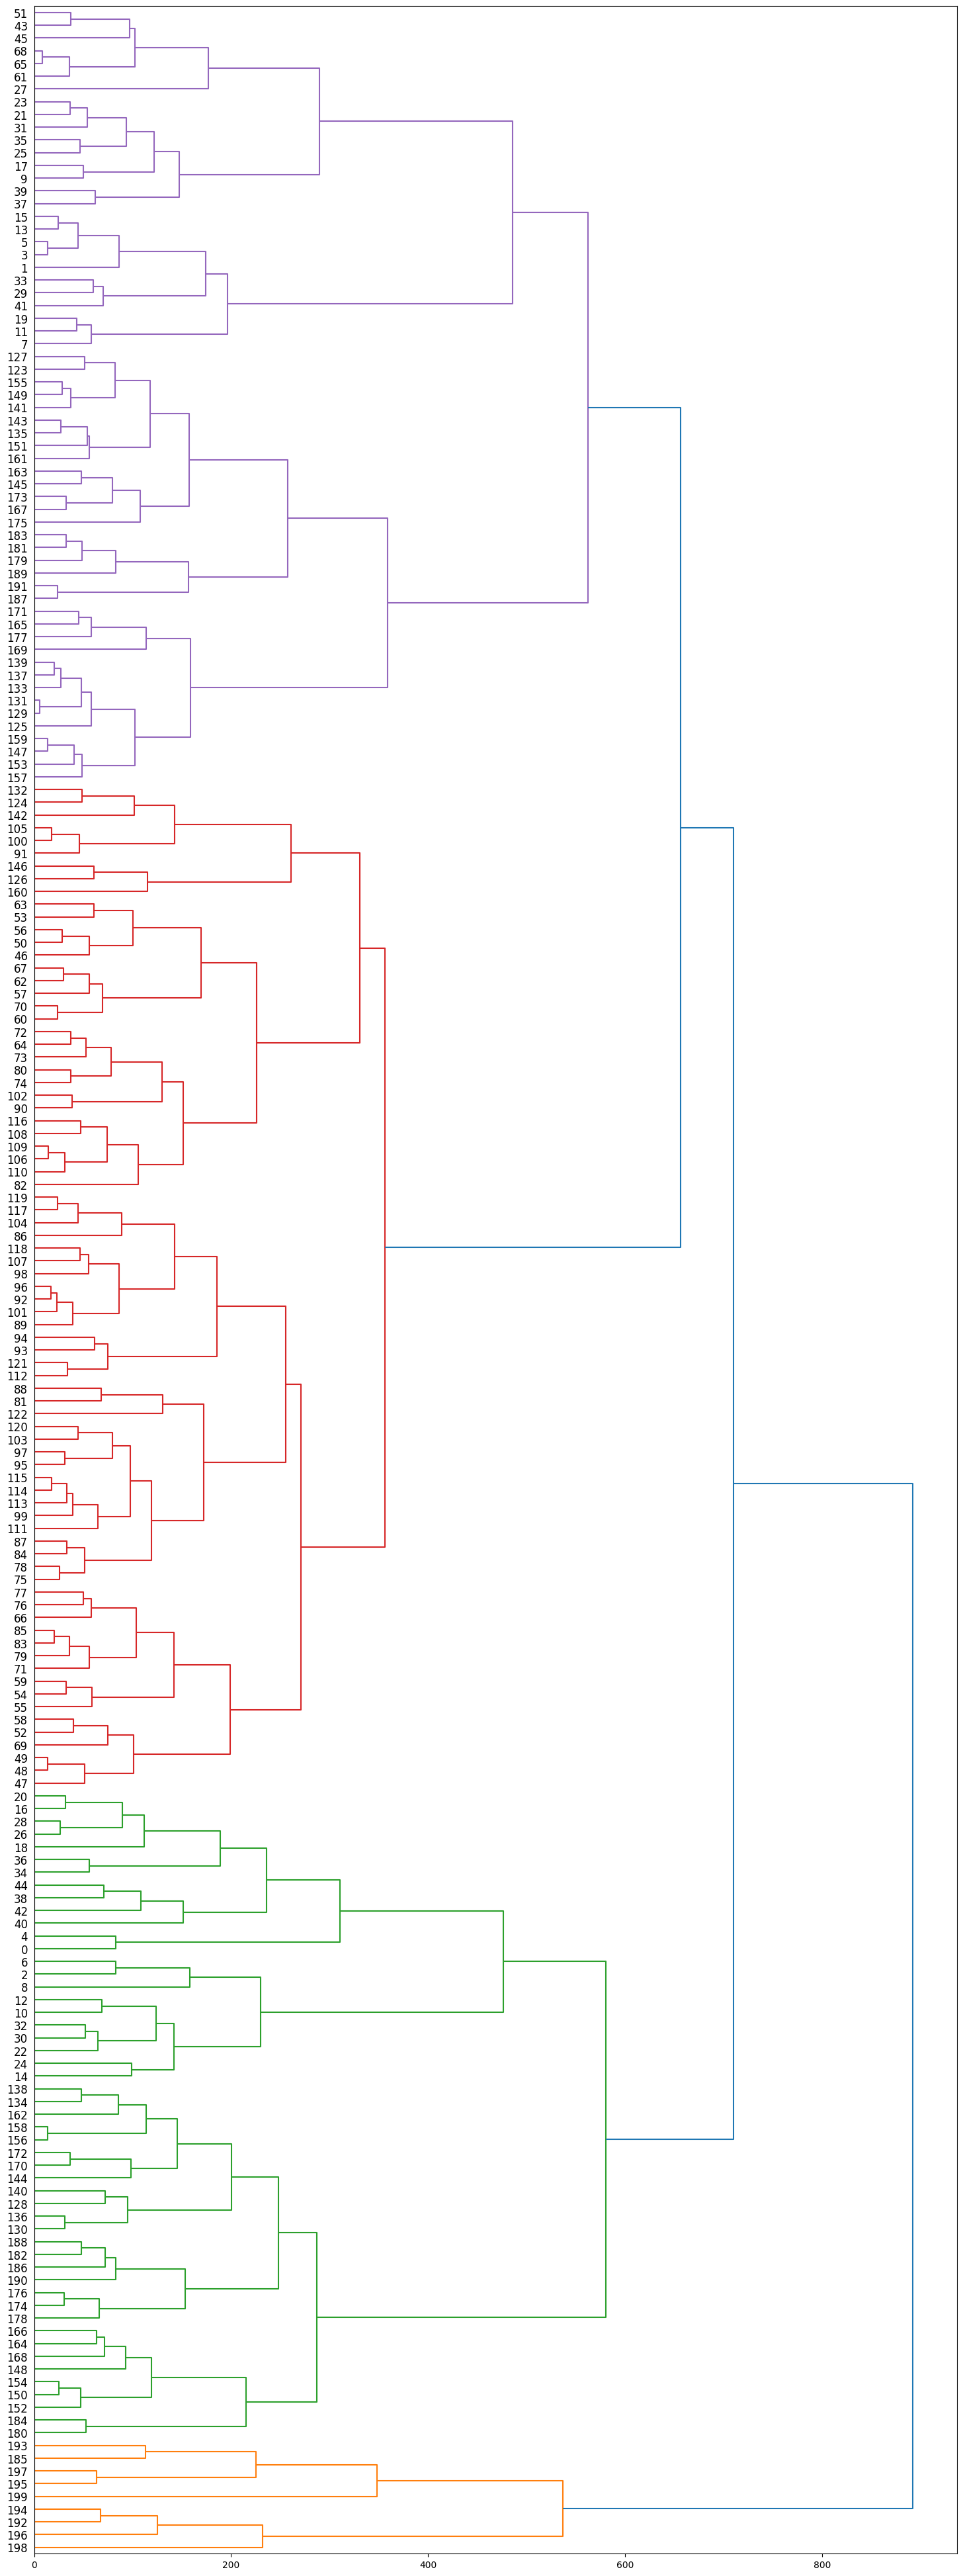

In [32]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

2. average linkage 사용

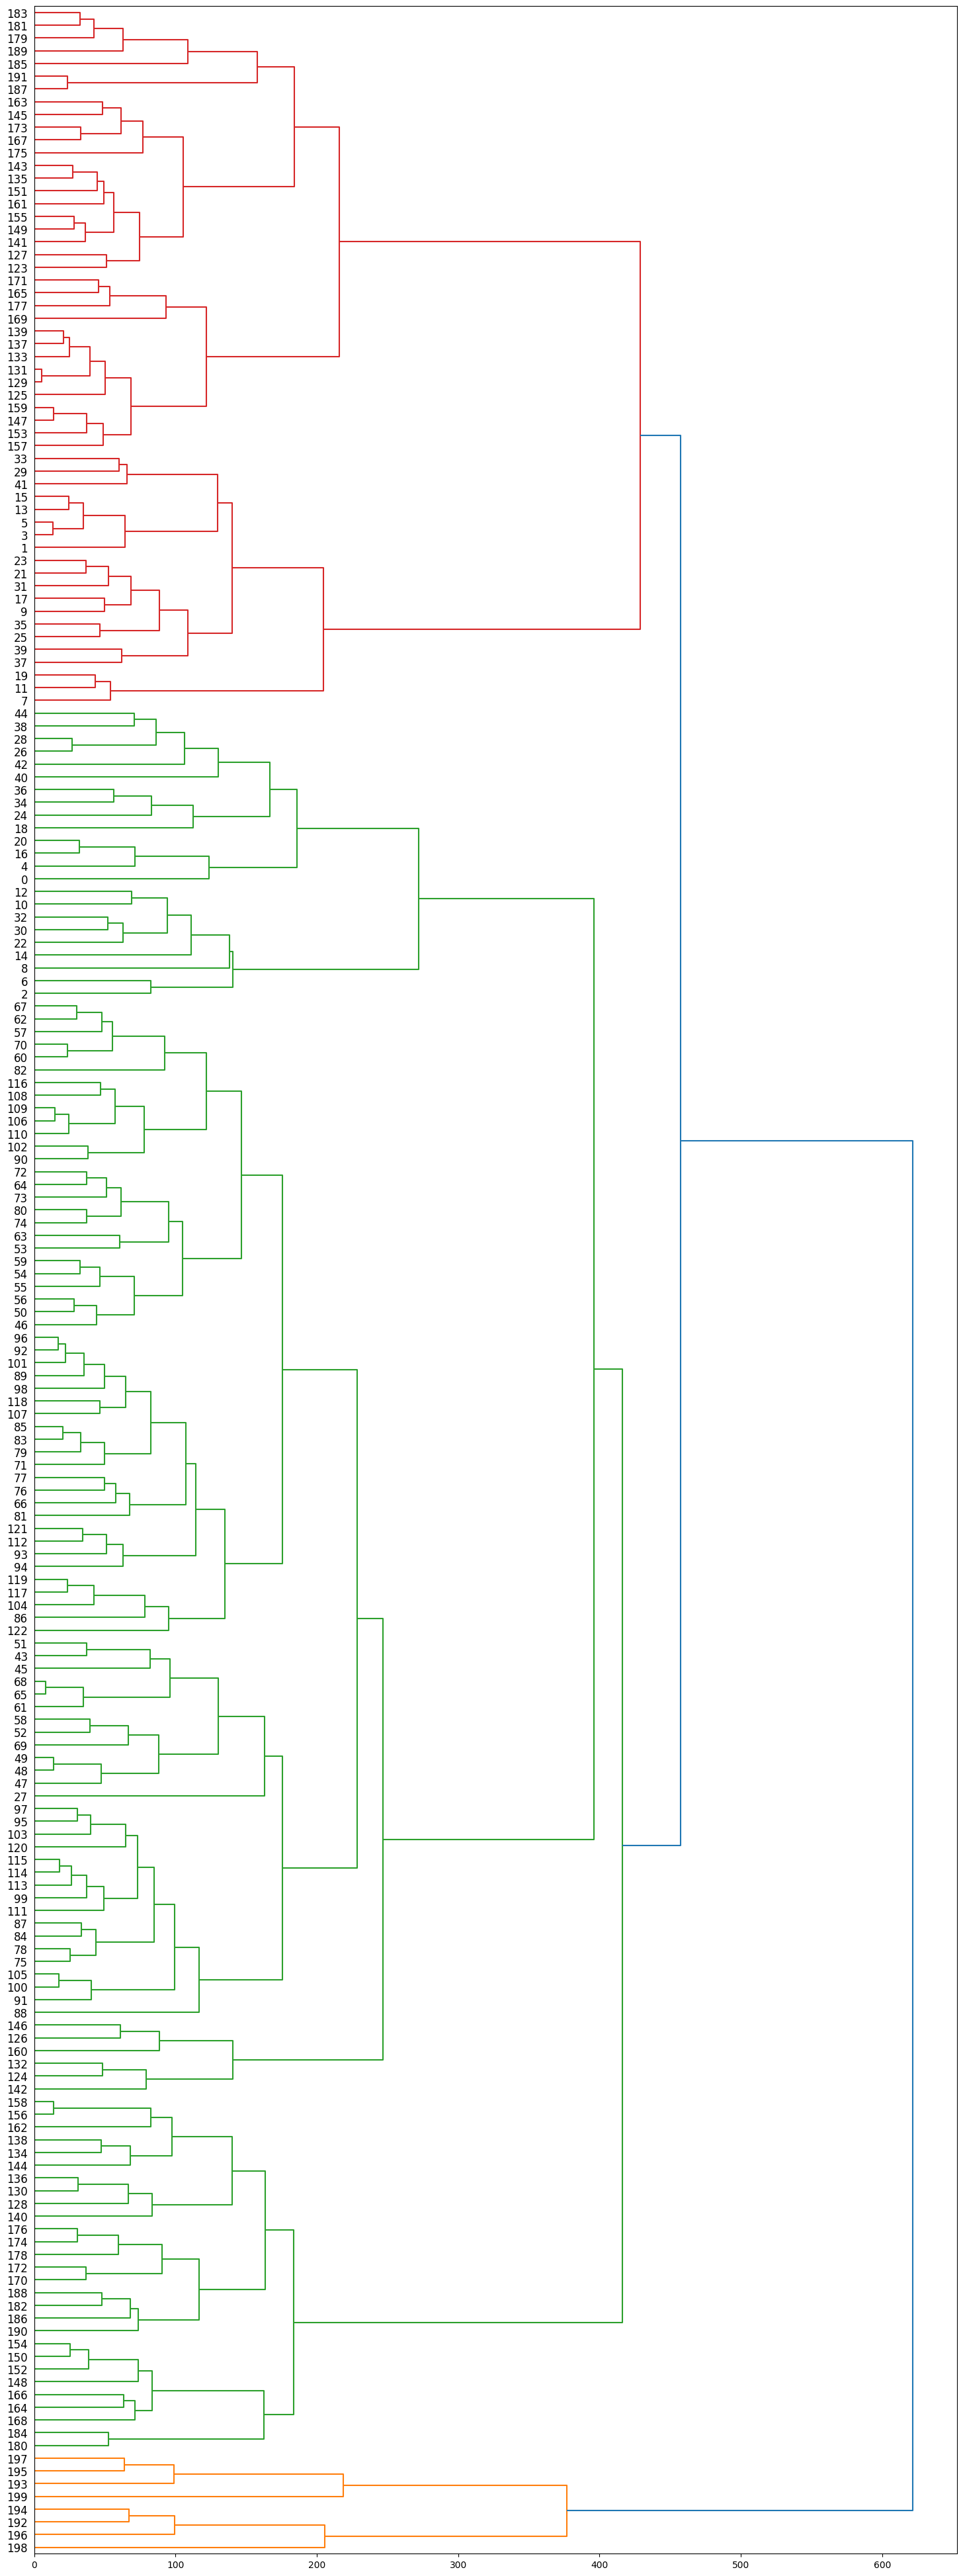

In [33]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Density Based Clustering (DBSCAN) : 밀도기반 클러스터링 - 같은 군집의 점끼리 몰려있을 것.


params
1. epsilon : dense area, 몰려있는 정도 원의 반지름
2. minimumSamples : 군집이 될 수 있는 최소 데이터 수

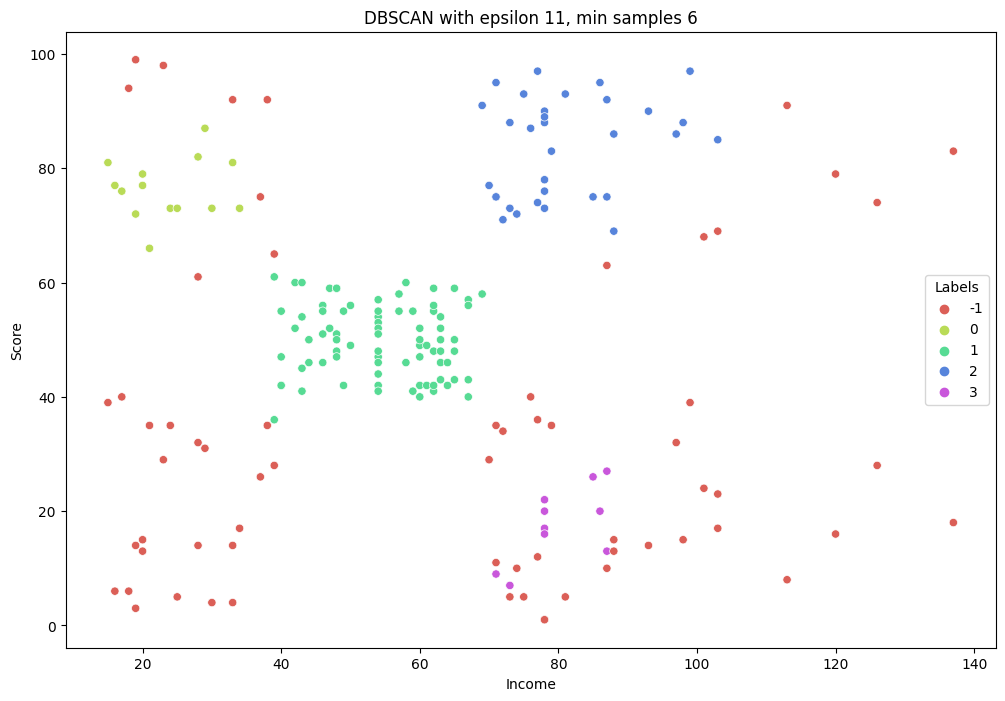

In [35]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Mean Shift Algo. : Centroid 기반. 분포된 데이터의 중심으로 점들을 이동시켜 군집 centroid 정하기. 자동으로 클러스터 수를 정함


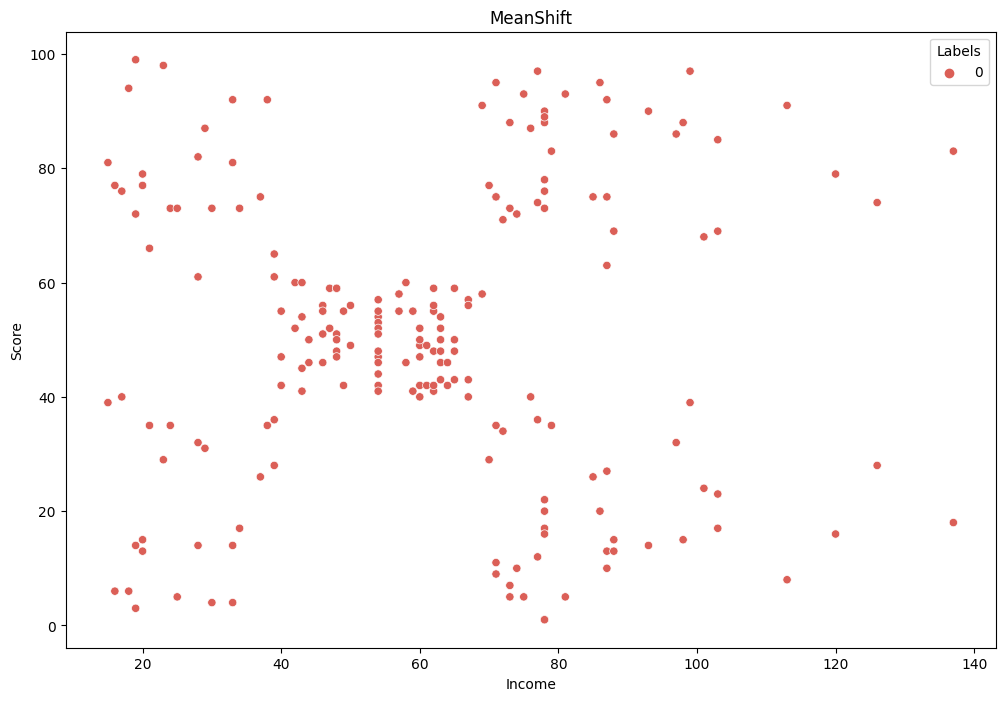

In [38]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift().fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

한꺼번에 보기

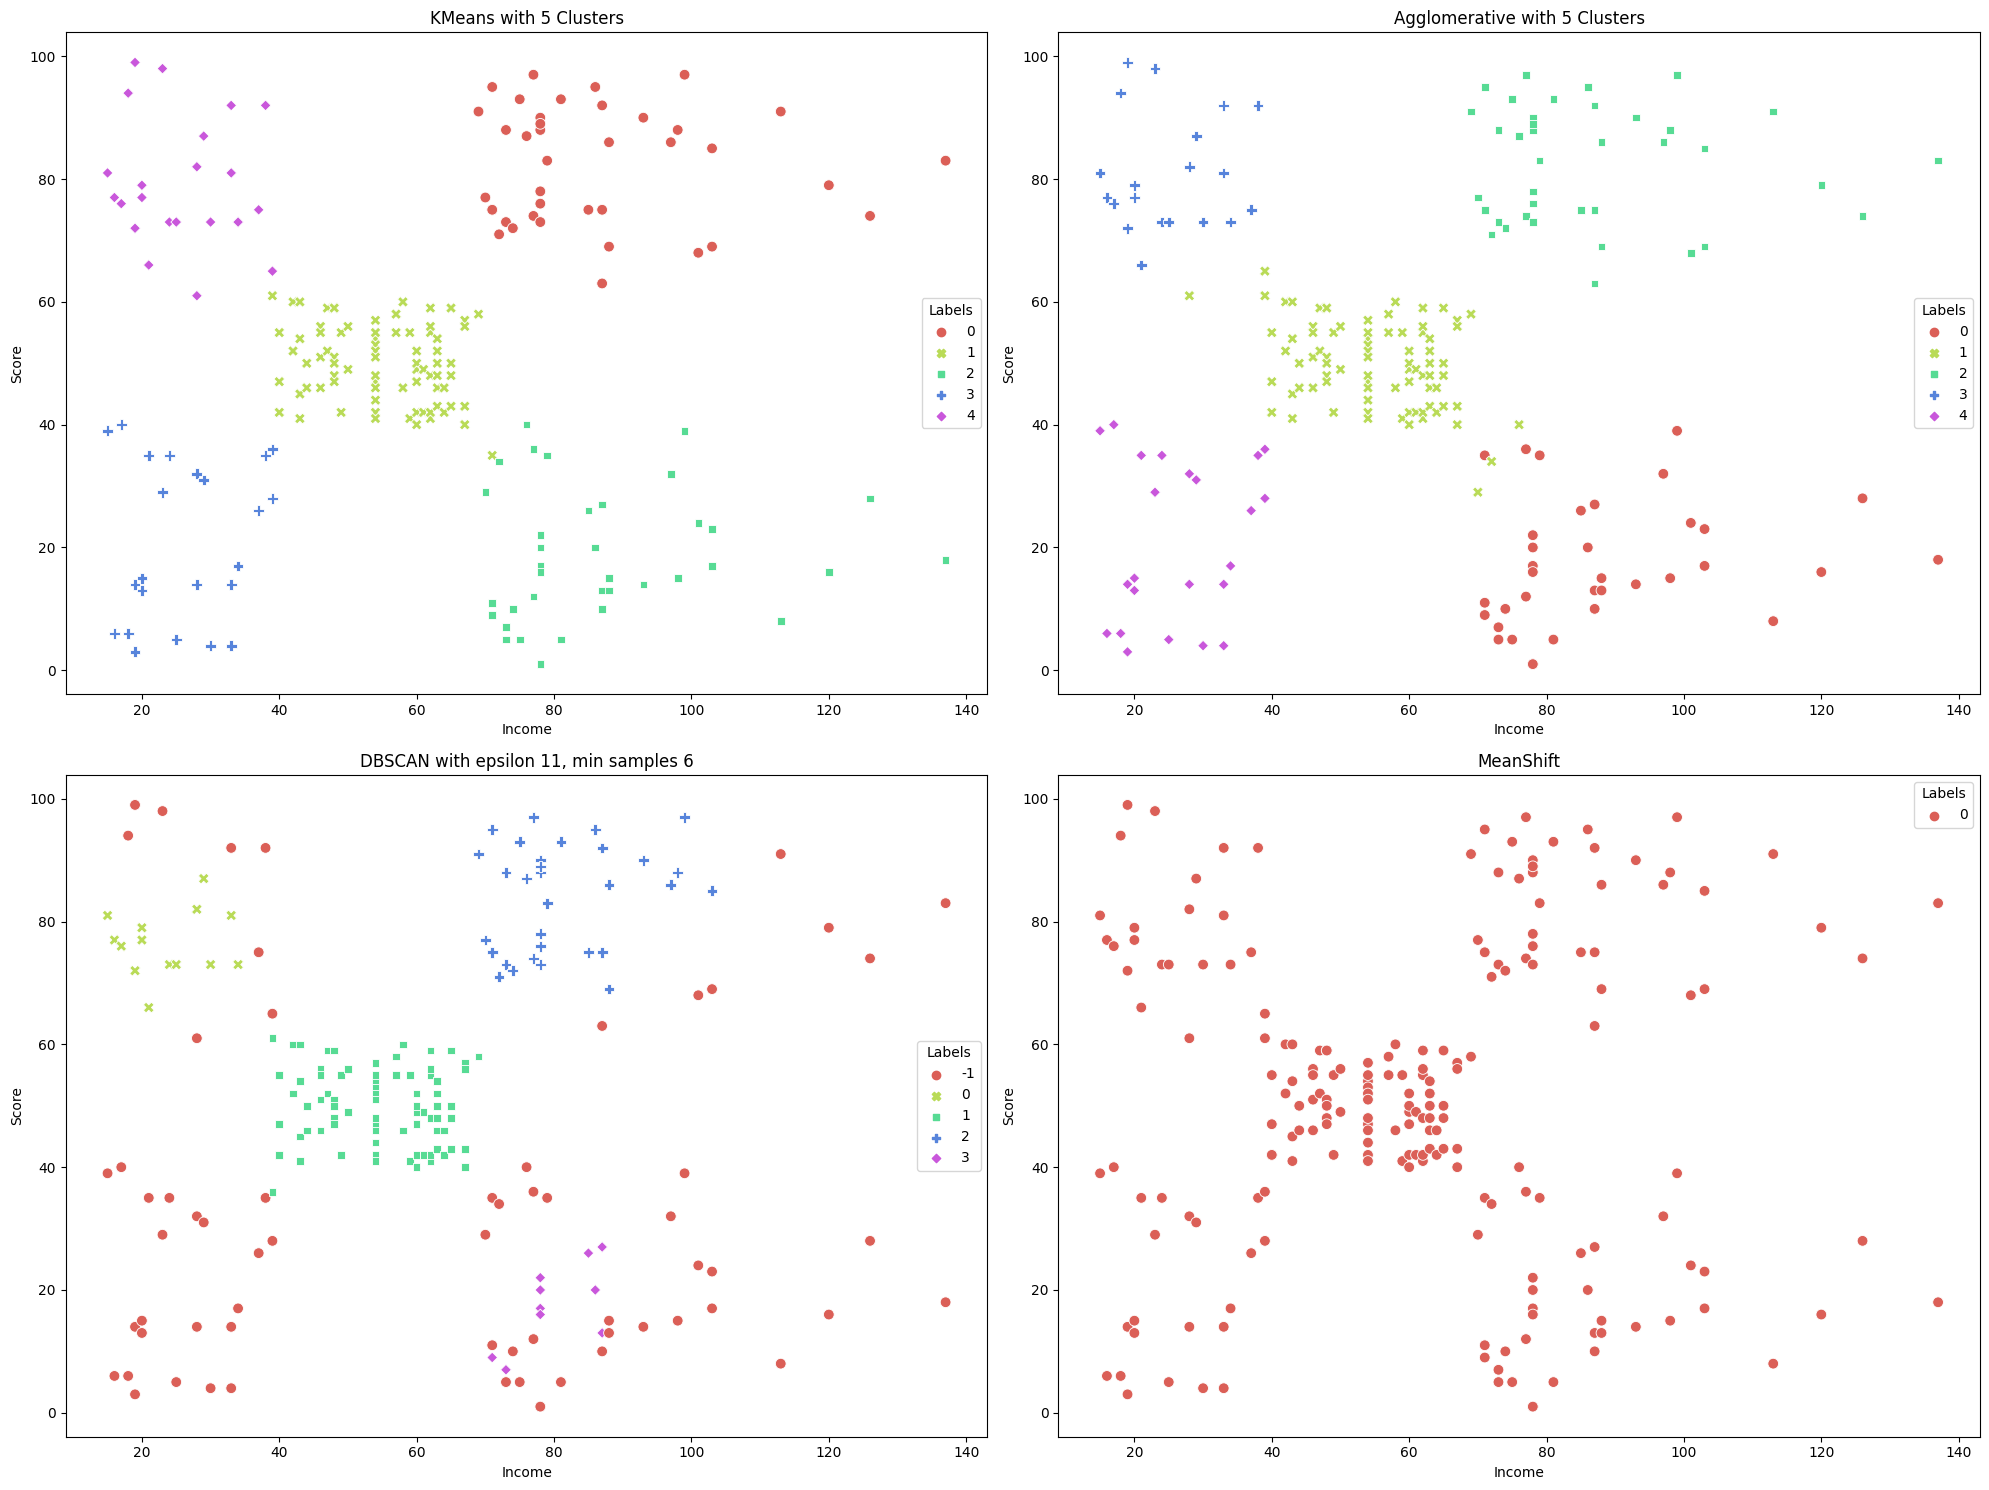

In [41]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift().fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(x='Income', y='Score', data=X, hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()